## COVID-19 ANALYSIS of WEST AFRICAN COUNTRIES
### by Kola Ademola

This an exploratory data analysis on the WHO COVID-19 world dataset.  
This analysis will be done using Python(pandas library specifically) and I will be focusing on how the virus has affected Africa.  
Starting of I will be importing the neccesary libraries and the dataset.

##### importing the libraries 

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
import seaborn as sb

##### importing the datasets

I'll be using The WHO COVID-19 world dataset.  
This dataset was gotten from their website. 

In [2]:
covid_data = pd.read_csv("WHO-COVID-19-global-data.csv")

###### confirming that the dataset was imported succesfully

In [3]:
covid_data.head(5)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


##### exploring and getting familiar with the covid-19 dataset

In [4]:
covid_data

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
217324,2022-07-03,ZW,Zimbabwe,AFRO,30,255710,0,5558
217325,2022-07-04,ZW,Zimbabwe,AFRO,16,255726,0,5558
217326,2022-07-05,ZW,Zimbabwe,AFRO,29,255755,0,5558
217327,2022-07-06,ZW,Zimbabwe,AFRO,0,255755,0,5558


In [9]:
covid_data.shape

(217329, 8)

The above tells us the dimension of the dataset and from this result we now know that this dataset contains 8 columns and 217329 rows.

In [37]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217329 entries, 0 to 217328
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Date_reported      217329 non-null  object
 1   Country_code       216412 non-null  object
 2   Country            217329 non-null  object
 3   WHO_region         217329 non-null  object
 4   New_cases          217329 non-null  int64 
 5   Cumulative_cases   217329 non-null  int64 
 6   New_deaths         217329 non-null  int64 
 7   Cumulative_deaths  217329 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 13.3+ MB


The above result gives us a brief info about the columns in the dataset ie  
the names of the columns,  
the data type of each column and   
it also tells us if they contain null values.

In [11]:
covid_data.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,2.173290e+05,2.173290e+05,217329.000000,2.173290e+05
mean,2.531733e+03,7.433075e+05,29.189768,1.286597e+04
std,1.636544e+04,3.806455e+06,158.068466,5.877534e+04
min,-3.295200e+04,0.000000e+00,-2440.000000,0.000000e+00
25%,0.000000e+00,3.300000e+02,0.000000,3.000000e+00
50%,2.300000e+01,1.406900e+04,0.000000,1.750000e+02
75%,4.890000e+02,2.010530e+05,6.000000,3.143000e+03
max,1.255932e+06,8.702004e+07,11447.000000,1.009269e+06


The above result gives us a statistical summary of the numerical columns in the dataset

##### I will be filtering the dataset to get only the African countries and this will be done by filtering the countries by the WHO African Regional Office(AFRO)

In [21]:
cd_africa = covid_data[covid_data.WHO_region == 'AFRO']
cd_africa

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
1834,2020-01-03,DZ,Algeria,AFRO,0,0,0,0
1835,2020-01-04,DZ,Algeria,AFRO,0,0,0,0
1836,2020-01-05,DZ,Algeria,AFRO,0,0,0,0
1837,2020-01-06,DZ,Algeria,AFRO,0,0,0,0
1838,2020-01-07,DZ,Algeria,AFRO,0,0,0,0
...,...,...,...,...,...,...,...,...
217324,2022-07-03,ZW,Zimbabwe,AFRO,30,255710,0,5558
217325,2022-07-04,ZW,Zimbabwe,AFRO,16,255726,0,5558
217326,2022-07-05,ZW,Zimbabwe,AFRO,29,255755,0,5558
217327,2022-07-06,ZW,Zimbabwe,AFRO,0,255755,0,5558


###### cd_africa is an abbreviation for "covid data africa"

###### Now we can begin exploring the dataset which now contains only African countries.

I will be selecting the columns relevant for this analysis

In [22]:
cd_africa = cd_africa[['Date_reported', 'Country', 'New_cases', 'New_deaths']]
cd_africa

,Date_reported,Country,New_cases,New_deaths
1834,2020-01-03,Algeria,0,0
1835,2020-01-04,Algeria,0,0
1836,2020-01-05,Algeria,0,0
1837,2020-01-06,Algeria,0,0
1838,2020-01-07,Algeria,0,0
...,...,...,...,...
217324,2022-07-03,Zimbabwe,30,0
217325,2022-07-04,Zimbabwe,16,0
217326,2022-07-05,Zimbabwe,29,0
217327,2022-07-06,Zimbabwe,0,0


###### I will be doing a quick conversion of the "Date_reported" column to make it an actual date data type so it can be used later for proper analysis

In [40]:
pd.to_datetime(cd_africa['Date_reported'])

1834     2020-01-03
1835     2020-01-04
1836     2020-01-05
1837     2020-01-06
1838     2020-01-07
            ...    
217324   2022-07-03
217325   2022-07-04
217326   2022-07-05
217327   2022-07-06
217328   2022-07-07
Name: Date_reported, Length: 45850, dtype: datetime64[ns]

In [47]:
cd_africa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45850 entries, 1834 to 217328
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date_reported  45850 non-null  datetime64[ns]
 1   Country        45850 non-null  object        
 2   New_cases      45850 non-null  int64         
 3   New_deaths     45850 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 2.8+ MB


###### We'll be seeing how the total amount of cases compares to the amount of deaths caused by the virus in Africa

In [15]:
cd_africa[['New_deaths', 'New_cases']].sum()

New_deaths     173695
New_cases     9140599
dtype: int64

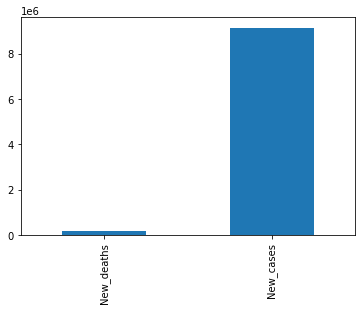

In [16]:
cd_africa[['New_deaths', 'New_cases']].sum().plot(kind = 'bar');

In [17]:
((cd_africa.New_deaths.sum() / cd_africa.New_cases.sum()) * 100).round(decimals = 2)

1.9

From the above results we can see that amount of deaths in Africa is a very small percentage of the amount of cases recorded in the continent.  
This is a good thing as the health officials are working tirelessly to make sure this numbers reduce.

###### We'll move on to comparing the number of recored deaths and cases in the countries and see how its affected individual countries

In [55]:
cd_cvd = cd_africa[['Country', 'New_cases', 'New_deaths']
                  ].groupby('Country').sum().sort_values(
                                                          by = ['New_cases', 'New_deaths'], ascending = False)
cd_cvd

,New_cases,New_deaths
Country,,
South Africa,3996441,101859
Ethiopia,489846,7548
Réunion,422769,812
Kenya,335092,5659
Zambia,326300,4008
Botswana,323327,2752
Algeria,266181,6875
Nigeria,257637,3144
Zimbabwe,255755,5558


South Africa is the country with the highestamount of cases and deaths   

###### cd_cvd is an abbreviation for "covid data cases vs deaths"

###### Calculating the percentage of recorded deaths to the cases

In [57]:
cd_cvd['Death_percentage'] = ((cd_cvd.New_deaths / cd_cvd.New_cases) * 100).round(decimals = 2)
cd_cvd

,New_cases,New_deaths,Death_percentage
Country,,,
South Africa,3996441,101859,2.55
Ethiopia,489846,7548,1.54
Réunion,422769,812,0.19
Kenya,335092,5659,1.69
Zambia,326300,4008,1.23
Botswana,323327,2752,0.85
Algeria,266181,6875,2.58
Nigeria,257637,3144,1.22
Zimbabwe,255755,5558,2.17


In [34]:
cd_cvd.reset_index(inplace = True)

###### Sorting out the top 5 countries with the highest death percentage

In [58]:
cd_cvd.sort_values(by = 'Death_percentage', ascending = False).head(5)

,New_cases,New_deaths,Death_percentage
Country,,,
Liberia,7500,294,3.92
Niger,9031,310,3.43
Malawi,86576,2646,3.06
Gambia,12009,365,3.04
Chad,7426,193,2.60


From the above result we can see now that even though South Africa recorded the highest number of cases & deaths  
its just a small percentage of the recorded cases.  

###### Calculating the total deaths recorded for each month since 2020

In [48]:
cd_africa.groupby([cd_africa.Date_reported.dt.year, cd_africa.Date_reported.dt.month])['New_deaths'].sum()

Date_reported  Date_reported
2020           1                    0
               2                    0
               3                  255
               4                 1098
               5                 1615
               6                 5899
               7                 7298
               8                 8552
               9                 4051
               10                2553
               11                2695
               12                8274
2021           1                20298
               2                 9519
               3                 5951
               4                 4685
               5                 4542
               6                 8413
               7                21332
               8                18876
               9                10463
               10                4306
               11                2280
               12                3233
2022           1                 8092
               2     

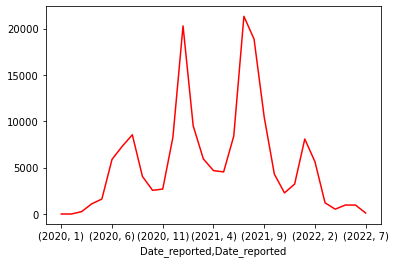

In [49]:
cd_africa.groupby([cd_africa.Date_reported.dt.year, cd_africa.Date_reported.dt.month])['New_deaths'].sum().plot(kind = 'line', color = 'red');

From the above results we can say that since July, 2021 there has been a gradual decline in the total amount of death in Africa caused by the virus.  
Note: There are some exceptional months(outliers) when a spike in the total amount of deaths since then, but still it keeps reducing.

###### This has been a fun experience exploring this dataset and with this I'll also add a world heatmap to support the visuals and give a clearer picture to support this analysis

###### Exporting the dataframe needed for the external visuals

In [59]:
cd_cvd.to_csv('cd_cvd.csv', index = True)